# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [484]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [442]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [443]:
data.drop('Unnamed: 0', inplace = True, axis=1)

In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


### 결측치, 이상치 확인 및 제거

In [445]:
# 결측치 확인
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [446]:
# 결측치 제거
data = data.drop(columns = 'New_Price') # New_Price는 결측치가 너무 많아 column자체를 제거
data = data.dropna(subset=['Mileage','Engine','Seats'])

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

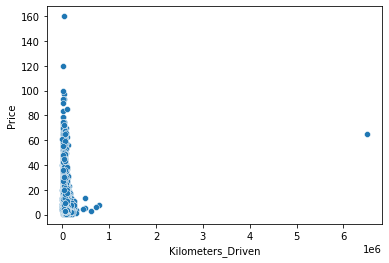

In [447]:
# 이상치 탐색
sns.scatterplot(data=data, x="Kilometers_Driven", y="Price")

Kilometers_Driven data에 이상치가 있는 것을 발견했습니다. 

In [448]:
# 이상치 제거
data = data[data['Kilometers_Driven']<6000000]

In [449]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5974.000000,5974.000000,5974.000000,5974.000000
mean,2013.386173,57596.088383,5.278875,9.492357
std,3.247173,37905.551386,0.809019,11.183639
min,1998.000000,171.000000,0.000000,0.440000
25%,2012.000000,33904.500000,5.000000,3.500000
50%,2014.000000,53000.000000,5.000000,5.650000
75%,2016.000000,73000.000000,5.000000,9.950000
max,2019.000000,775000.000000,10.000000,160.000000


Mileage가 0인 값이 있어 제거해주겠습니다.

In [450]:
# Mileage 값이 0인 것의 개수 확인
print((data['Mileage']== 0).sum())
data = data[data['Mileage']!=0]

0


In [451]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5974.000000,5974.000000,5974.000000,5974.000000
mean,2013.386173,57596.088383,5.278875,9.492357
std,3.247173,37905.551386,0.809019,11.183639
min,1998.000000,171.000000,0.000000,0.440000
25%,2012.000000,33904.500000,5.000000,3.500000
50%,2014.000000,53000.000000,5.000000,5.650000
75%,2016.000000,73000.000000,5.000000,9.950000
max,2019.000000,775000.000000,10.000000,160.000000


In [452]:
# 결측치 확인
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   object 
 8   Engine             5974 non-null   object 
 9   Power              5974 non-null   object 
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.7+ KB


결측치가 깔금하게 없어졌습니다.

### 변수 타입 설정

In [454]:
# kmkg, kmpl의 개수 확인
kmkg = 0
kmpl = 0
for i in data.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 66 
The number of rows with Kmpl : 5908 


In [463]:
# convert str to int Mileage
Correct_Mileage= []
# convert str to int Power
Correct_Power= []
# convert str to int Engine
Correct_Engine= []

null = []
for i in data.index: 
    mileage = data['Mileage'][i].split()[0]
    power = data['Power'][i].split()[0]
    engine = data['Engine'][i].split()[0]
    
    # 제거 되지 않은 결측치 제거
    if power == 'null' or engine == 'null' or float(mileage) == 0:
        null.append(i)
        continue
        
    Correct_Mileage.append(float(mileage))
    Correct_Power.append(float(power))
    Correct_Engine.append(float(engine))

In [464]:
data = data.drop(null, axis=0)

In [465]:
data['Mileage']=Correct_Mileage
data['Power']=Correct_Power
data['Engine']=Correct_Engine

In [466]:
data["Company"] = data["Name"].str.split().str[0]

In [467]:
data = data.drop(columns='Name')

### Scaling

In [468]:
# 수치형 열들
numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

array([[<AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Power'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

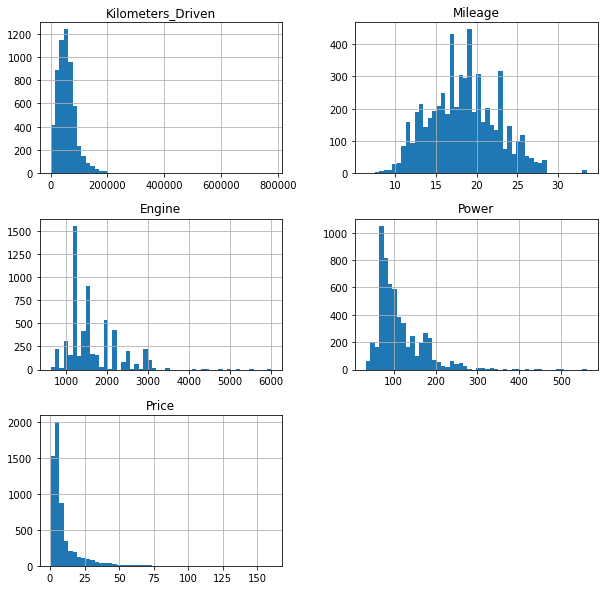

In [469]:
data.hist(column=numerical_columns, bins=50, figsize=(10,10))

Kilometers_Driven, Engine, Power, Price normal distribution을 따르지 않습니다. 따라서 scaling을 진행합니다.

In [470]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])
data['log_Engine'] = np.log(data['Engine'])
data['log_Power'] = np.log(data['Power'])
data['log_Price'] = np.log(data['Price'])

In [471]:
data = data.drop(columns=['Kilometers_Driven', 'Engine', 'Power', 'Price'])

array([[<AxesSubplot:title={'center':'log_Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'log_Engine'}>,
        <AxesSubplot:title={'center':'log_Power'}>],
       [<AxesSubplot:title={'center':'log_Price'}>, <AxesSubplot:>]],
      dtype=object)

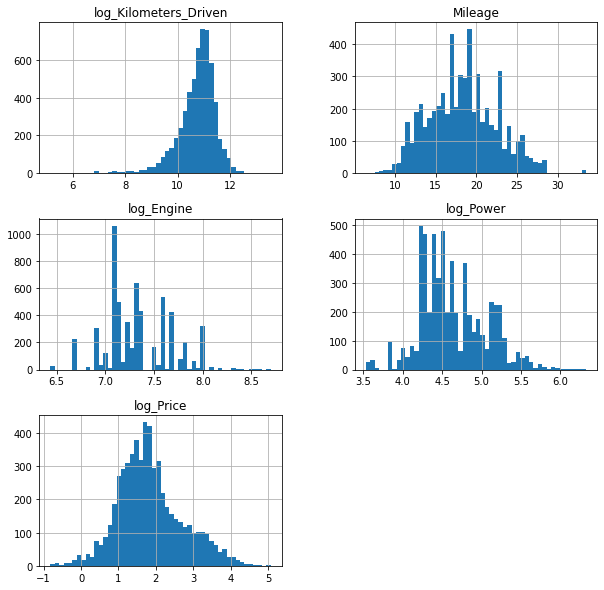

In [497]:
new_numerical_columns = ['log_Kilometers_Driven', 'Mileage', 'log_Engine', 'log_Power', 'log_Price']
data.hist(column=new_numerical_columns, bins=50, figsize=(10,10))

### 범주형 변수 더미로 변환

In [475]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel')
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission')
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner')
Year_dummy = pd.get_dummies(data['Year'], prefix='Year')
Seat_dummy = pd.get_dummies(data['Seats'], prefix='Seat')
Company_dummy = pd.get_dummies(data['Company'], prefix='Company')

In [476]:
data = pd.concat([data, Fuel_dummy, Transmission_dummy, Owner_dummy, Year_dummy, Seat_dummy, Company_dummy],axis=1)

In [477]:
data = data.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats', 'Company'], axis=1)

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5843 entries, 0 to 6018
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mileage                 5843 non-null   float64
 1   log_Kilometers_Driven   5843 non-null   float64
 2   log_Engine              5843 non-null   float64
 3   log_Power               5843 non-null   float64
 4   log_Price               5843 non-null   float64
 5   Fuel_CNG                5843 non-null   uint8  
 6   Fuel_Diesel             5843 non-null   uint8  
 7   Fuel_LPG                5843 non-null   uint8  
 8   Fuel_Petrol             5843 non-null   uint8  
 9   Transmission_Automatic  5843 non-null   uint8  
 10  Transmission_Manual     5843 non-null   uint8  
 11  Owner_First             5843 non-null   uint8  
 12  Owner_Fourth & Above    5843 non-null   uint8  
 13  Owner_Second            5843 non-null   uint8  
 14  Owner_Third             5843 non-null   

In [482]:
X, y = data[new_numerical_columns].values, data['log_Price'].values

# 선형 회귀 분석

In [483]:
# data split into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.shape, y_test.shape)

(4674,) (1169,)


In [485]:
# 선형 회귀 분석
model = LinearRegression()
model.fit(X_train, y_train)

# 모수
print(f"w: {model.coef_}\nb: {model.intercept_}")

w: [2.34528705e-15 1.66533454e-16 2.27595720e-15 1.37910516e-15
 1.00000000e+00]
b: -5.839773109528323e-14


In [486]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [488]:
# R-squared
print(f"train R-squared: {model.score(X_train, y_train)}")
print(f"test R-squared: {model.score(X_test, y_test)}")
print(f"train MSE: {mean_squared_error(pred_train, y_train)}")
print(f"test MSE: {mean_squared_error(pred_test, y_test)}")

train R-squared: 1.0
test R-squared: 1.0
train MSE: 3.0862106795031e-29
test MSE: 3.127964701751754e-29


# 회귀 진단

### 선형성 판단

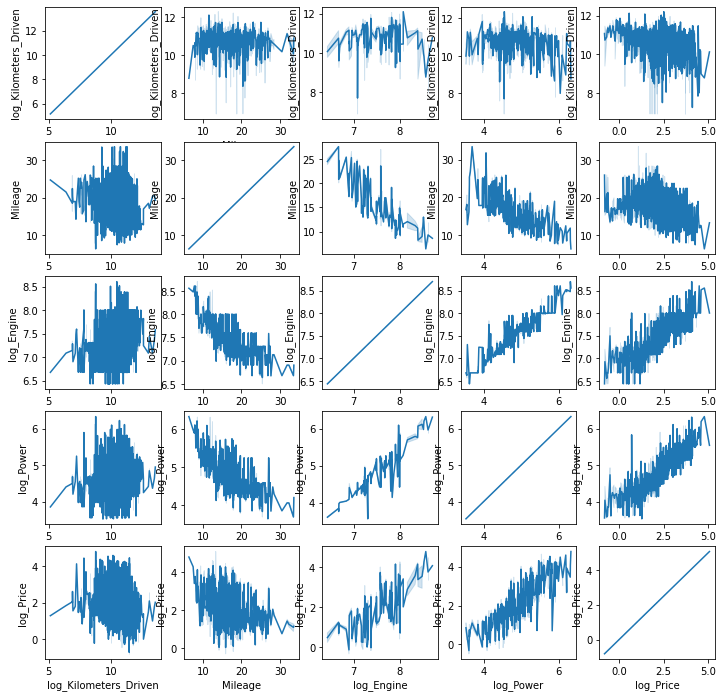

In [541]:
# 선형성 판단
grid = gridspec.GridSpec(5, 5)
plt.figure(figsize = (12, 12))
for i,col1 in enumerate(new_numerical_columns):
    for j,col2 in enumerate(new_numerical_columns):
        ax = plt.subplot(grid[5*i+j])
        sns.lineplot(x=col2, y=col1,ax=ax, data=data[new_numerical_columns])

price와 선형관계가 있다고 볼 수 있는 변수들은 Engine, Power 라고 생각합니다.

### 잔차의 정규성 판단

<AxesSubplot:ylabel='Density'>

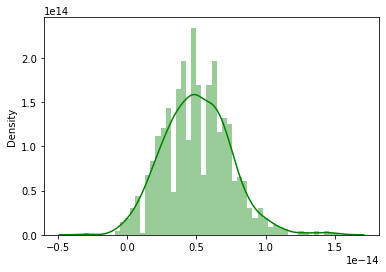

In [511]:
# 정규성 판단
residual = y_test - pred_test
sns.distplot(residual, bins = 50, color='g')

잔차가 정규성을 만족하는 것처럼 보입니다.

### 등분산성 판단

[-1.71815836  0.30193849 -1.53451319 -0.43264218 -0.43264218 -2.45273903
  0.30193849  0.85287399 -1.90180353  0.48558366] [2.87638552 1.178655   2.58625914 2.87073578 3.50043922 3.96157478
 2.12465388 2.47485631 3.2554006  2.48740353]


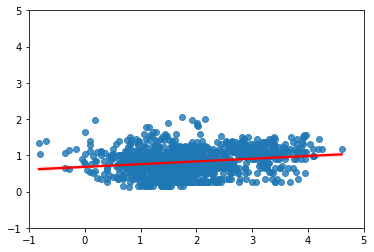

In [540]:
# 잔차의 등분산성 
import scipy.stats

sr = scipy.stats.zscore(residual)
print(sr[:10], pred_test[:10])
sns.regplot(pred_test, np.sqrt(np.abs(sr)), line_kws={'color': 'red'})
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

빨간선이 거의 직선과 같기 때문에 등분산성을 만족합니다.

### 다중공선성 판단

<AxesSubplot:>

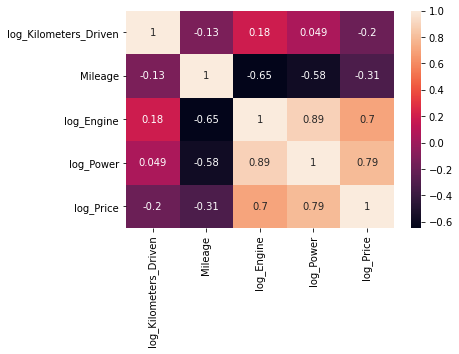

In [480]:
# 상관관계 
sns.heatmap(data[new_numerical_columns].corr(), annot=True)

In [544]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = ols('log_Price ~ log_Kilometers_Driven + Mileage + log_Engine + log_Power', data[new_numerical_columns])

res = model.fit()

pd.DataFrame({'feature': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,feature,VIF
0,log_Kilometers_Driven,1.106635
1,Mileage,1.723358
2,log_Engine,5.904749
3,log_Power,5.045852
